# Adding warmup to any TF learning rate scheduler

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from optimization_tf import WarmUp, create_optimizer
import tensorflow as tf
import numpy as np

## LR without warmup

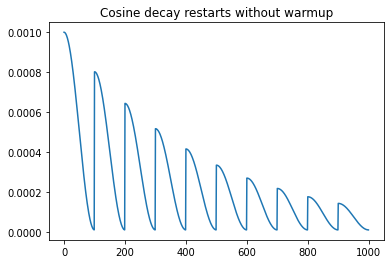

In [5]:
init_lr = 1e-3
cosine_decay_fn = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate = init_lr,
    first_decay_steps=100,
    t_mul=1,
    m_mul=.8,
    alpha=0.01,
    name=None
)
steps = np.array(range(1000))
plt.title('Cosine decay restarts without warmup')
plt.plot(steps, [cosine_decay_fn(step) for step in steps]);

## LR with warmup applied

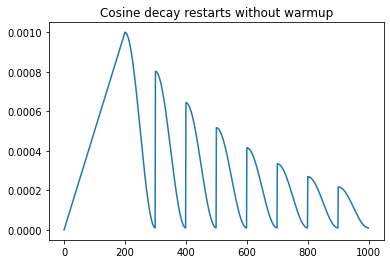

In [6]:
init_lr = 1e-3
num_warmup_steps = 200

cosine_decay_fn = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate = init_lr,
    first_decay_steps=100,
    t_mul=1,
    m_mul=.8,
    alpha=0.01,
    name=None
)

lr_schedule = WarmUp(
    initial_learning_rate=init_lr,
    decay_schedule_fn=cosine_decay_fn,
    warmup_steps=num_warmup_steps)

steps = np.array(range(1000))
plt.title('Cosine decay restarts without warmup')
plt.plot(steps, [lr_schedule(step) for step in steps]);

## LR with warmup based on polynomial decay 

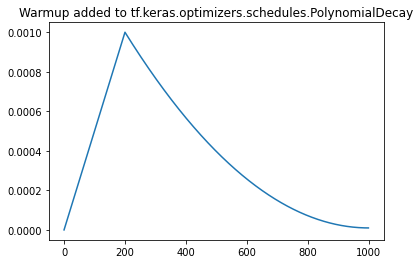

In [7]:
_, lr_sched = create_optimizer(
    init_lr=1e-3,
    num_train_steps=1000,
    num_warmup_steps=200,
    min_lr_ratio=0.01,
    adam_beta1=0.9,
    adam_beta2=0.999,
    adam_epsilon=1e-8,
    weight_decay_rate=0,
    power=2)

steps = np.array(range(1000))
plt.title('Warmup added to tf.keras.optimizers.schedules.PolynomialDecay')
plt.plot(steps, [lr_sched(step) for step in steps]);